In [ ]:
import control as ct
from dataclasses import dataclass
import numpy as np

## Laser
$\text{The thermal response of a laser is a function of two aspects: The thermal and frequency FM.}$
$\text{Below is the expression for the FM response:}$
$$H_{\text{Laser}}(f) = K_{\text{fast}} - \frac{K_{th}}{1 + \sqrt{jf/f_c}}$$

In [ ]:
s = ct.tf([1,0],[0,1])
class laser_laplace_model:
    pass

## Transimpedance Amplifier
$\text{We can model the transimpedance amplifier as a low pass filter.}$
$$H_{TIA}(s) = \frac{K_{\text{TIA}}}{1 + \frac{s}{\omega_p}} = \frac{K_{\text{TIA}}}{1 + \frac{s}{2\pi f_{\text{3dB}}}} [\Omega] \,\,\, \text{where } K_{\text{TIA}} = \text{ Transimpedance Gain}$$

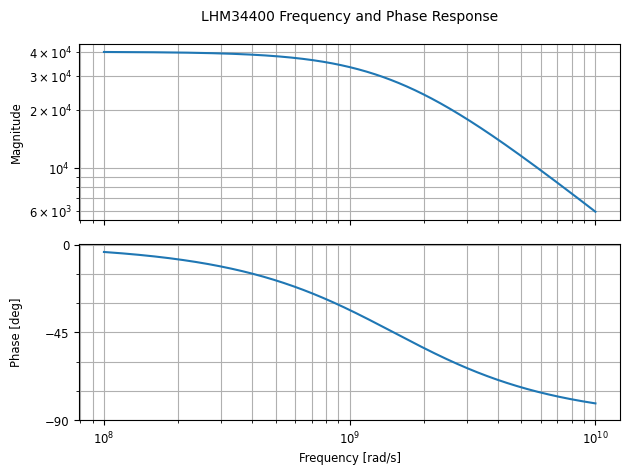

In [ ]:
@dataclass
class tia_params:
    f_3dB : float
    K_TIA : float

class LMH34400(tia_params):
    f_3dB = 240e6
    K_TIA = 40*1000

class tia:
    tia_vals : tia_params
    def __init__(self,tia_vals_ : tia_params):
        self.tia_vals = tia_vals_
    def model(self):
        s = ct.tf([1,0],[0,1])
        return self.tia_vals.K_TIA/(1 + s/(2*np.pi*self.tia_vals.f_3dB))

# plot frequency and phase characteristics for the LHM34400
ct.bode_plot(tia(tia_vals_=LMH34400).model(),title='LHM34400 Frequency and Phase Response')

